# Exploring the public CHTS data

Sam Maurer, August 2017 | Python 3.6

Original version June 2017 (v01)  
Updated Aug 2017 (v02) to look into data type issues in the raw data

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import zipfile

In [2]:
# See ../data/README.md for instructions about how to get the data

z = zipfile.ZipFile('../data/caltrans_full_survey.zip')

## Households

Households that participated in the travel diary survey

In [3]:
households = pd.read_csv(z.open('caltrans_full_survey/survey_households.csv'), low_memory=False)

len(households)

42426

In [4]:
# Limit to the Bay Area

households_ba = households[households.home_county_id.isin([1, 13, 41, 55, 75, 81, 85, 95, 97])]

len(households_ba)

9715

In [5]:
# Top home locations

households_ba.home_city.value_counts()[:15]

SAN FRANCISCO    1076
SAN JOSE          939
OAKLAND           459
SANTA ROSA        321
BERKELEY          251
NAPA              228
PALO ALTO         218
SUNNYVALE         200
SAN MATEO         197
FREMONT           177
WALNUT CREEK      173
REDWOOD CITY      170
FAIRFIELD         159
CONCORD           158
SAN RAFAEL        158
Name: home_city, dtype: int64

In [6]:
households.persons_count.describe()

count    42421.000000
mean         2.571462
std          1.373733
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: persons_count, dtype: float64

In [7]:
households.hhwgt.describe()

count    42421.000000
mean         0.999955
std          0.704667
min          0.003498
25%          0.447392
50%          0.915924
75%          1.376790
max          5.400840
Name: hhwgt, dtype: float64

In [8]:
households.exphhwgt.describe()

count    42421.000000
mean       293.007784
std        206.482227
min          1.025146
25%        131.095416
50%        268.385115
75%        403.428487
max       1582.559559
Name: exphhwgt, dtype: float64

In [9]:
households.home_tract_id.describe()

count    4.242100e+04
mean     6.056293e+09
std      2.944557e+07
min      6.001400e+09
25%      6.037207e+09
50%      6.059042e+09
75%      6.079011e+09
max      6.115041e+09
Name: home_tract_id, dtype: float64

## Persons

In [10]:
persons = pd.read_csv(z.open('caltrans_full_survey/survey_person.csv'), low_memory=False)

len(persons)

109113

In [11]:
print(persons[['sampno', 'perno', 'travel_date', 'gender', 'relation', 
               'education', 'race1']].head(10))

    sampno  perno travel_date  gender  relation  education  race1
0  7128119      1  2013-01-27       1         1          6    1.0
1  7128119      3  2013-01-27       2         3          1    1.0
2  7128138      1  2012-11-05       2         1          5    1.0
3  7128262      1  2012-12-21       2         1          1    1.0
4  7128262      3  2012-12-21       2         3          2    1.0
5  7128262      2  2012-12-21       1         2          1    1.0
6  7128288      2  2013-01-22       1         3          3    1.0
7  7128288      1  2013-01-22       2         1          5    1.0
8  7128316      1  2012-12-29       2         1          4    1.0
9  7128372      1  2012-12-29       2         1          6    1.0


In [12]:
# What is `person_trips`? -- not sure, but it looks related to the `tripno` field

persons.person_trips.describe()

count    108776.000000
mean          3.233838
std           2.954577
min           0.000000
25%           1.000000
50%           2.000000
75%           5.000000
max          33.000000
Name: person_trips, dtype: float64

In [13]:
persons.empl_tract_id.describe()

count    4.311100e+04
mean     6.241008e+09
std      3.120183e+09
min      2.614000e+03
25%      6.037238e+09
50%      6.059064e+09
75%      6.079011e+09
max      1.000000e+11
Name: empl_tract_id, dtype: float64

In [14]:
persons.empl_tract_id.notnull().describe()

count     109113
unique         2
top        False
freq       66002
Name: empl_tract_id, dtype: object

In [15]:
persons.school_tract_id.describe()

count    2.543800e+04
mean     6.342777e+09
std      3.678070e+09
min      4.005001e+09
25%      6.037233e+09
50%      6.059063e+09
75%      6.079010e+09
max      1.000000e+11
Name: school_tract_id, dtype: float64

In [16]:
persons.school_tract_id.notnull().describe()

count     109113
unique         2
top        False
freq       83675
Name: school_tract_id, dtype: object

In [17]:
persons.perwgt.describe()

count    109113.000000
mean          0.999999
std           0.962373
min           0.000568
25%           0.322230
50%           0.717519
75%           1.329846
max           5.060089
Name: perwgt, dtype: float64

## Places

Each record represents a single visit to a place

In [18]:
places = pd.read_csv(z.open('caltrans_full_survey/survey_place.csv'), low_memory=False)

len(places)

460524

In [19]:
print(places.columns)

Index(['sampno', 'perno', 'plano', 'vehno', 'tripno', 'place_name',
       'travel_date', 'arr_time', 'dep_time', 'mode', 'trip_distance_miles',
       'air_trip_distance_miles', 'tripdistanceflag', 'prev_trip_duration_min',
       'act_dur', 'act_cnt', 'block_id', 'tract_id', 'county_id', 'state_id',
       'place_primarycity', 'city', 'zipcode', 'state', 'parked_loc_type',
       'parked_other_loc_type', 'parked_address', 'parked_minutes',
       'parked_payed', 'parked_amount_payed', 'parked_unit', 'parked_pay_type',
       'parked_other_pay_type', 'parked_paymen_ne', 'got_out_vehicle',
       'transit_system', 'transit_system_other', 'perwgt', 'expperwgt', 'tcf',
       'tcfperwgt', 'exptcfperwgt', 'tottr', 'hhmem', 'lon', 'lat',
       'non_hh_members', 'route', 'per1', 'per2', 'per3', 'per4', 'per5',
       'geom'],
      dtype='object')


In [20]:
# Print some raw data to make sure the pandas type inferences are reasonable

with z.open('caltrans_full_survey/survey_place.csv', 'r') as f:
    _ = f.readline()  # discard column headers
    print(f.readline())
    print(f.readline())

b'1031985,1,1,,,REDACTED,2012-05-01,03:00:00,08:00:00,,,,,,340.0,3.0,REDACTED,252202.0,95.0,6.0,VALLEJO,VALLEJO,94591,CA,,,REDACTED,,,,,,,,,,,0.052086,17.647568,,,,,,REDACTED,REDACTED,,,,,,,,REDACTED\r\n'
b'1031985,1,2,97.0,1.0,REDACTED,2012-05-01,09:00:00,12:00:00,6.0,13.428271,7.647539,,22.0,231.0,1.0,REDACTED,252108.0,95.0,6.0,BENICIA,BENICIA,94510,CA,,,REDACTED,,,,,,,,1.0,,,0.052086,17.647568,0.969788,0.050512,17.114408,2.0,0.0,REDACTED,REDACTED,1.0,,,,,,,REDACTED\r\n'


In [21]:
# Filter for places visited by people who live in the Bay Area (may want to do use a
# different filter depending on the application)

places_ba = places[places.sampno.isin(households_ba.sampno)]

len(places_ba)

117345

In [22]:
# Is there a unique identifier?

# Might need to use combination of `sampno` (household), `perno` (person within hh),
# `plano` (place within person's travel diary)

# What's `tripno`? ("unlinked trip ID" - maybe representing transfer between modes)

print(places_ba[['sampno', 'perno', 'plano', 'tripno']].head(10))

      sampno  perno  plano  tripno
0    1031985      1      1     NaN
1    1031985      1      2     1.0
2    1031985      1      3     2.0
3    1031985      2      1     NaN
4    1031985      2      2     1.0
5    1031985      2      3     2.0
118  1033944      1      1     NaN
119  1033944      1      2     1.0
120  1033944      1      3     2.0
121  1033944      1      4     3.0


In [23]:
# Is every combination of `sampno`, `perno`, `plano` unique? -- Yes

len(places_ba.groupby(['sampno', 'perno', 'plano']))

117345

In [24]:
# How many places have a `tripno`? -- about 80%

places_ba.tripno.count()

93406

In [25]:
# Is the `tripno` ever repeated? -- No

len(places_ba.groupby(['sampno', 'perno', 'plano', 'tripno']))

117345

In [26]:
places_ba.tripno.describe()

count    93406.000000
mean         3.817185
std          2.841705
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         32.000000
Name: tripno, dtype: float64

In [27]:
# Can we see the place names? -- No

places_ba.place_name.head()

0    REDACTED
1    REDACTED
2    REDACTED
3    REDACTED
4    REDACTED
Name: place_name, dtype: object

In [28]:
places_ba.city.value_counts().head(15)

SAN FRANCISCO    15680
SAN JOSE         11414
OAKLAND           5455
SANTA ROSA        3441
BERKELEY          3185
PALO ALTO         2664
SUNNYVALE         2440
SAN MATEO         2190
NAPA              2160
FREMONT           2126
REDWOOD CITY      2067
MOUNTAIN VIEW     1948
WALNUT CREEK      1896
SANTA CLARA       1816
CONCORD           1800
Name: city, dtype: int64

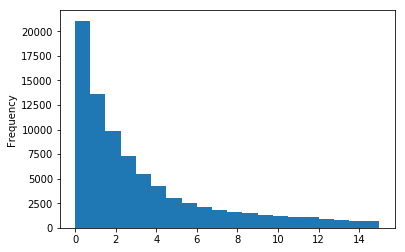

In [29]:
places_ba.trip_distance_miles.plot.hist(bins=20, range=(0,15));

In [30]:
# Most detailed spatial identifier in public data is tract_id

# How many different tracts are visited?
places_ba.tract_id.unique().shape[0]

2296

In [31]:
# How many different households?
places_ba.sampno.unique().shape[0]

9715

In [32]:
# How many different people?
len(places_ba.groupby(['sampno','perno']))

23939

In [33]:
# How are the ID's encoded?

print(places_ba[['sampno','perno','plano','tract_id','county_id','state_id']].head(3))

    sampno  perno  plano  tract_id  county_id  state_id
0  1031985      1      1  252202.0       95.0       6.0
1  1031985      1      2  252108.0       95.0       6.0
2  1031985      1      3  252202.0       95.0       6.0


In [34]:
# Do the floating point decimals encode anything, or is it just a mistake in the source
# data that they're not all stored as ints? (Looks like a mistake, and my guess is it
# happened because int columns can't have missing values in certain database systems.)

asfloat = places_ba[['tract_id','county_id','state_id']].dropna()
asint = places_ba[['tract_id','county_id','state_id']].dropna().astype(int)

print((asfloat - asint).describe())

       tract_id  county_id  state_id
count  117344.0   117344.0  117344.0
mean        0.0        0.0       0.0
std         0.0        0.0       0.0
min         0.0        0.0       0.0
25%         0.0        0.0       0.0
50%         0.0        0.0       0.0
75%         0.0        0.0       0.0
max         0.0        0.0       0.0


In [35]:
# What does the travel mode data look like? We can replace null values with zero

print(places_ba[['mode']].isnull().sum())
print(places_ba[['mode']].describe())

mode    23939
dtype: int64
               mode
count  93406.000000
mean       5.279147
std        4.039473
min        1.000000
25%        5.000000
50%        5.000000
75%        6.000000
max       29.000000


## Census identifiers

In [36]:
# Suppress scientific notation

pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [37]:
# Is the mapping between census tracts and city names consistent? -- No

print(places.tract_id.drop_duplicates().shape[0])
print(places[['tract_id', 'city']].drop_duplicates().shape[0])

6912
14388


In [38]:
places.tract_id.describe()

count   460519
mean    191724
std     242716
min        100
25%       5911
50%      43317
75%     402800
max     999999
Name: tract_id, dtype: float64

In [39]:
places.county_id.describe()

count   460519
mean        58
std         50
min          1
25%         37
50%         59
75%         79
max        999
Name: county_id, dtype: float64

In [40]:
places.state_id.describe()

count   460523
mean         6
std          5
min          1
25%          6
50%          6
75%          6
max         99
Name: state_id, dtype: float64

In [41]:
places.state_id.value_counts().head(5)

6     455641
99      1064
32       957
41       454
4        412
Name: state_id, dtype: int64

In [42]:
# How to deal with this? I think `tract_id` is an integer representation
# of the 4-digit tract ID within the couty plus the 2 digit suffix. 

# So the full unique identifier is `state_id` + `county_id` (3 digits) + `tract_id` (6 digits)

places['_full_tract_id'] = places.state_id * 1e9 + places.county_id * 1e6 + places.tract_id

# Presumably the all-9 entries reflect missing data, but documentation doesn't specify

places.loc[(places.tract_id == 999999) |
           (places.county_id == 999) |
           (places.state_id == 99), '_full_tract_id'] = np.nan

In [43]:
print(places._full_tract_id.drop_duplicates().shape[0])
print(places[['_full_tract_id', 'city']].drop_duplicates().shape[0])

9098
14194


In [44]:
places[['_full_tract_id', 'city']].drop_duplicates().\
        _full_tract_id.value_counts().head(5)

6115041100    14
6091010000    12
6027000800    11
6107000100    10
6097154303    10
Name: _full_tract_id, dtype: int64

In [45]:
print(places[['_full_tract_id', 'city']].drop_duplicates().\
        loc[places._full_tract_id == 6115041100])

        _full_tract_id                   city
3238        6115041100            BROWNSVILLE
18952       6115041100             MARYSVILLE
33913       6115041100         NORTH SAN JUAN
44697       6115041100                DOBBINS
44705       6115041100                   YUBA
100194      6115041100                 BANGOR
160254      6115041100           CAMPTONVILLE
178724      6115041100      STRAWBERRY VALLEY
271235      6115041100  CHALLENGE-BROWNSVILLE
271250      6115041100           OREGON HOUSE
300021      6115041100             FORBESTOWN
317626      6115041100   CHALLENGE-BROWNSVILL
402446      6115041100          BROWNS VALLEY
403959      6115041100               RACKERBY


So, there are still many census tracts that correspond to more than one city. I think we probably just want to use the census tracts as our unit of analysis. 

For descriptive purposes we can map each census tract to its most common corresponding city.

In [46]:
# Map each tract to its most common corresponding city

tracts = places[['_full_tract_id', 'city']].groupby('_full_tract_id').\
        agg(lambda x:x.value_counts().index[0])
    
print(tracts.head())

                      city
_full_tract_id            
1015000800        ANNISTON
1101001500      MONTGOMERY
1161400100         SEVILLA
2020001000       ANCHORAGE
2020001100       ANCHORAGE


In [47]:
print(places._full_tract_id.drop_duplicates().shape[0])
print(tracts.shape[0])

9098
9097


## Activities

"The activity reported is for a single travel day and contains the highest level of detail about the survey participants' travel purpose" (data dictionary)

So, there can be multiple "activities" at each "place" visited as part of a trip.

In [48]:
activities = pd.read_csv(z.open('caltrans_full_survey/survey_activity.csv'), low_memory=False)

len(activities)

604711

In [49]:
# TO DO - fix to reflect households

activities_ba = activities[activities.county_id.isin([1, 13, 41, 55, 75, 81, 85, 95, 97])]

len(activities_ba)

157011

In [50]:
# What do the identifiers look like? 

print(activities_ba[['sampno', 'perno', 'plano', 'actno', 'tripno']].head(10))

     sampno  perno  plano  actno  tripno
1   1041766      3      1      1     nan
4   1051203      1      9      1       8
8   1065929      1      1      1     nan
14  1097949      1      1      1     nan
22  1124271      1      5      1       4
27  1126030      2      1      1     nan
30  1127449      2      1      1     nan
32  1127626      1      1      1     nan
35  1128657      1      1      1     nan
37  1129482      1      1      1     nan


In [51]:
# Each place occurs in the activities table at least once

print((activities_ba.actno == 1).sum())  # number of activities with id 1

print(len(activities_ba.groupby(['sampno', 'perno', 'plano'])))  # unique places referenced

print(len(places_ba))  # records in places table

118271
118271
117345


In [52]:
activities.sampno.describe()

count    604711
mean    2624572
std     1695612
min     1031985
25%     1662824
50%     1979173
75%     2797238
max     7212388
Name: sampno, dtype: float64

In [53]:
activities.perno.describe()

count   604711
mean         2
std          1
min          1
25%          1
50%          2
75%          3
max          8
Name: perno, dtype: float64

In [54]:
activities.plano.describe()

count   604711
mean         3
std          3
min          1
25%          1
50%          3
75%          5
max         34
Name: plano, dtype: float64

## Trips

What's the correct way to aggregate places into trips?

It seems like each person recorded their travel for a single day as a sequence of places visited, without explicit classification into trips or tours. So that's up to us to do by applying whatever rules seem appropriate. 

Probably it's not even possible to identify tours with certainty from the anonymized data, because the place names and precise locations are redacted.

In [55]:
# Dig into `tripno` some more

places_ba.groupby(['sampno', 'perno']).plano.max().head(10)

sampno   perno
1031985  1         3
         2         3
1033944  1        16
1035274  1         8
         2         6
1037952  1         3
         2         1
1039620  1         5
         2         5
1041076  1         4
Name: plano, dtype: int64

In [56]:
# Do any respondents have multiple trip sequences? -- No!

plano_counts = places_ba.groupby(['sampno', 'perno']).plano.max()
tripno_counts = places_ba.groupby(['sampno', 'perno']).tripno.max()

(plano_counts - tripno_counts).describe()

count   19512
mean        1
std         0
min         1
25%         1
50%         1
75%         1
max         1
dtype: float64

In [57]:
(places_ba.plano - places_ba.tripno).describe()

count   93406
mean        1
std         0
min         1
25%         1
50%         1
75%         1
max         1
dtype: float64

In [58]:
# What does a sequence of places look like?

varlist = ['travel_date', 'arr_time', 'dep_time', 'tract_id', 'city', 'mode', 
           'trip_distance_miles', 'prev_trip_duration_min', 'act_dur']

places_ba.loc[(places_ba.sampno == 1035274) & (places_ba.perno == 1), varlist]

,travel_date,arr_time,dep_time,tract_id,city,mode,trip_distance_miles,prev_trip_duration_min,act_dur
152,2012-07-17,03:00:00,10:00:00,509000,SUNNYVALE,nan,nan,nan,425
153,2012-07-17,10:00:00,10:00:00,509000,SUNNYVALE,5,1,10,30
154,2012-07-17,11:00:00,11:00:00,508504,SUNNYVALE,5,2,15,1
155,2012-07-17,11:00:00,11:00:00,508504,SUNNYVALE,1,0,5,9
156,2012-07-17,11:00:00,13:00:00,508504,SUNNYVALE,1,0,5,105
157,2012-07-17,13:00:00,14:00:00,509000,SUNNYVALE,5,2,10,60
158,2012-07-17,14:00:00,15:00:00,500100,SAN JOSE,5,8,20,25
159,2012-07-17,15:00:00,02:00:00,509000,SUNNYVALE,5,9,20,699


So, it looks like the key to identifying trip/tour semantics involves looking at the trip purposes in the activities table. Transfers are noted as a particular purpose, and those trip legs need to be aggregated together. 

The first and last activities of the day probably take place at home, but we can't verify using the public data.

It looks like the arrival and departure times, and trip durations, are approximate based on people's recollections, but distances are precise because they come from the Google Maps interface.

## Travel modes

In [59]:
# What are the travel modes?

places_ba['mode'].value_counts().head(10)

5     50139
6     18632
1     15924
2      2244
15     1635
24     1444
7       566
26      459
8       299
25      293
Name: mode, dtype: int64

FROM DATA DICTIONARY

Travel mode:

- 1- Walk; 
- 2- Bike; 
- 3- Wheelchair/mobility scooter; 
- 4- Other non-motorized; 
- 5- Auto/van/truck driver; 
- 6- Auto/van/truck passenger; 
- 7- Carpool/vanpool; 
- 8- Motorcycle/scooter/moped; 
- 9- Taxi/hired car/limo; 
- 10- Rental car/vehicle; 
- 11- Private shuttle (Super shuttle, employer, hotel, etc.); 
- 12- Greyhound bus; 
- 13- Plane; 
- 14- Other private transit; 
- 15- Local bus, rapid bus; 
- 16- Express bus/commuter bus (AC Transbay, Golden Gate Transit, etc.); 
- 17- Premium bus (Metro Orange/Silver Line); 
- 18- School bus; 
- 19- Public transit shuttle (DASH, Emery Go Round, etc.); 
- 20- AirBART/LAX FlyAway; 
- 21- Dial-a-ride/paratransit (access services, etc.); 
- 22- Amtrak bus; 
- 23- Other bus; 
- 24- BART, Metro Red/Purple Line; 
- 25- ACE, Amtrak, Cal- train, Coaster, Metrolink; 
- 26- Metro Blue/Green/Gold Line, Muni Metro, Sacramento Light Rail, San Diego Sprinter/Trolley/Orange/ Blue/Green, VTA light rail; 
- 27- Streetcar/cable car, 
- 28- Other rail; 
- 29- Ferry/boat; 
- 99- RF

## Trip purposes

In [60]:
# What are the trip purposes?

activities_ba.purpose.value_counts().head(15)

1     47241
2     16700
21     9523
9      9151
27     8583
22     7250
8      6151
7      5792
37     5040
31     4737
39     3484
17     3105
25     3039
34     2701
29     2541
Name: purpose, dtype: int64

FROM DATA DICTIONARY

[Somewhere there's a `ptype` key indicating categories of purposes, probably based on the home/ work/ school locations, but I can't find it in these data tables.]

Activity purpose: 

[These look like activities at home]

- 1- Personal activities (sleeping, personal care, leisure, chores); 
- 2- Preparing meals/eating; 
- 3- Hosting visitors/entertaining guests; 
- 4- Exercise (with or without equipment)/playing sports; 
- 5- Study/schoolwork; 
- 6- Work for pay at home using telecommunications equipment; 
- 7- Using computer/telephone/cell or smart phone, or other communications device for personal activities; 
- 8- All other activities at home; 

[These look like activites at work]

- 9- Work/job duties; 
- 10- Training; 
- 11- Meals at work; 
- 12- Work-sponsored social activities (holiday/birthday celebrations, etc.); 
- 13- Non-work-related activities (social clubs, etc.); 
- 14- Exercise/sports; 
- 15- Volunteer work/activities, 
- 16- All other work- related activities at work; 

[These look like activities at school]

- 17- School/classroom/ laboratory; 
- 18- Meals at school/college; 
- 19- After-school or non-class-related sports/physical activities; 
- 20- All other after-school or non-class-related activities (library, music rehearsal, clubs, etc.); 

[These look like transport-related]

- 21- Change type of transportation/transfer (walk to bus, walk to/from parked car); 
- 22- pick up/drop off passenger(s); 

[These look like activities at non-home, non-work, non-school locations]

- 23- Drive-through meals (snacks, coffee, etc.) (show if PTYPE <> 1 [Home]); 
- 24- Drive-through other (ATM, bank, etc.) (show if PTYPE <> 1); 
- 25- Work-related (meetings, sales calls, deliveries); 
- 26- Service private vehicle (gas, oil, lubes, repairs), 
- 27- Routine shopping (groceries, clothing, convenience store, household maintenance, etc.); 
- 28- Shopping for major purchases or specialty items (appliance, electronics, new vehicles, major household repairs, etc.); 
- 29- Household errands (bank, dry cleaning, etc.); 
- 30- Personal business (visit government office, attorney, accountant, etc.); 
- 31- Eat meal at restaurant/diner; 
- 32- Health care (doctor, dentist, eye care, chiropractor, veterinarian, etc.); 
- 33- Civic/ religious activities; 
- 34- Outdoor exercise (outdoor sports, jogging, bicycling, walking the dog, etc.); 
- 35- Indoor exercise (gym, yoga, etc.); 
- 36- Entertainment (movies, sporting events, etc.); 
- 37- Social/visiting friends and relatives; 
- 38- Other (specify), 

[Misc]

- 39- Loop trip (for interviewer only- not listed on diary), 
- 99- DK/RF